<h1>Linear Regression<h1>

In this notebook, we try to perform linear regression on SeoulSpeed dataset https://github.com/yuyolshin/SeoulSpeedData

In [ ]:
<blockquote>Define dataset file path</blockquote>

In [1]:
URBAN_CORE_CSV = 'urban-core.csv'
ADJ_URBAN_CORE_CSV = 'Adj(urban-core).csv'
URBAN_MIX_CSV = 'urban-mix.csv'
ADJ_URBAN_MIX_CSV = 'Adj(urban-mix).csv'

<blockquote>Import necessary library</blockquote>

In [6]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<blockquote>Preprocess data frame from csv, train model, and plot result</blockquote>

In [8]:
def linear_regression(): 
    # read speed matrix data
    data_core_csv = pd.read_csv(URBAN_CORE_CSV, header=None) 
    data_mix_csv = pd.read_csv(URBAN_MIX_CSV, header=None)

    # speed timestep start from column 8
    # omit column 1 - 7 
    data_core_csv = data_core_csv.drop(data_core_csv.columns[0:7], axis=1).reset_index(drop=True)

    # Check if there are any zero values in the entire DataFrame
    if (data_core_csv == 0).any().any():
        print("There are zero values in the DataFrame.")
    else:
        print("There are no zero values in the DataFrame.")

    # Calculate the average of each column
    column_averages = data_core_csv.mean().to_frame('Mean')

    # add lag
    column_averages['Lag_1'] = column_averages['Mean'].shift(12)

    X = column_averages.loc[:, ['Lag_1']].reset_index(drop=True)
    X.dropna(inplace=True)  # drop missing values in the feature set
    Y = column_averages.loc[:, 'Mean'].reset_index(drop=True)  # create the target
    Y, X = Y.align(X, join='inner')  # drop corresponding values in target

    num_train_rows = 6048 # 21 days
    # Select the rows for the training independent variable set
    X_train = X.iloc[:num_train_rows].reset_index(drop=True)

    # Select the rows for the test independent variable set (remaining rows)
    X_test = X.iloc[num_train_rows:].reset_index(drop=True)

    # Select the rows for the training dependent variable set
    Y_train = Y.iloc[:num_train_rows].reset_index(drop=True)

    # Select the rows for the test dependent variable set (remaining rows)
    Y_test = Y.iloc[num_train_rows:].reset_index(drop=True)

    # Create a linear regression model
    model = LinearRegression()

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = pd.Series(model.predict(X_test), index= X_test.index)

    # Evaluate the model's performance
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Print model information
    print("Linear Regression Model Information:")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2):", r2)

    # Plot original dataset
    _, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    ax1.plot(column_averages.index, column_averages['Mean'], linewidth=1.0, color='blue', label='Data value')  
    ax1.plot(column_averages.index, column_averages['Lag_1'], linewidth=1.0, color='red', label='Previous time step')  
    ax1.set_xlabel("Time Step")
    ax1.set_ylabel("Speed")
    ax1.legend()

  
    ax2.plot(X_test.index, X_test['Lag_1'], label='test data',  linewidth=1.0, color='blue')  
    ax2.plot(Y_pred.index, Y_pred, label = 'prediction data',  linewidth=1.0, color='red')  
    ax2.set_xlabel("Time Step")
    ax2.set_ylabel("Speed")
    ax2.legend()
    plt.savefig('Prediction & Test Dataset Comparison', bbox_inches='tight', dpi=300)

    plt.show()

Linear Regression Model Information:
Coefficients: [0.93531292]
Intercept: 1.781544976128835
Mean Squared Error (MSE): 2.549352090279238
R-squared (R2): 0.8859603241918063


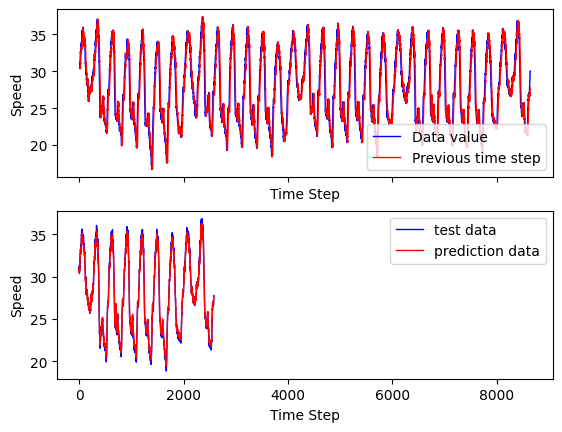

In [5]:
linear_regression()